### Context:

The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.

### Content
This dataset contains the unemployment rate of all the states in India

- Region = states in India
- Date = date which the unemployment rate observed
- Frequency = measuring frequency (Monthly)
- Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India
- Estimated Employed = percentage of people employed
- Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force

## Inspiration
### Questions?

- How Covid-19 affects the employment
- how far the unemployment rate will go

# Steps to Perform.
1. Import Packages & Reading Dataset.
2. Basic Information.
3. Data Cleaning
4. EDA : Exploratory Data Analysis
5. Summary

## Step 1.1: Importing the packages

In [1]:
## importing the necessary dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
%matplotlib inline

In [2]:
## supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
## setting the max row & columns display to 130
pd.set_option("display.max_columns",130)
pd.set_option("display.max_rows",130)

## Step 1.2: Importing the dataset

In [4]:
PATH  = "./Unemployment in India.csv"
df19 = pd.read_csv(PATH)
df19.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## 2. Basic Information.

In [5]:
## Step 2.1 Shape of dataset.
num_rows = f"No. of rows: {df19.shape[0]}"
num_cols = f"No. of cols: {df19.shape[1]}"
dimentation = f"{num_rows} x {num_cols}"
print("<-----------------------Shape of dataset--------------------------->")
print(dimentation)

<-----------------------Shape of dataset--------------------------->
No. of rows: 768 x No. of cols: 7


In [6]:
## Step 2.2 Data type info about the datasets.
df19.info()   ## This method prints the dtypes info and the no of cols and row in datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### observations:
- Column index 1 to 5 having extra spaces before the column name.
- The date column is in object type. This is need to be converted into to date type. Rest all the columns data types are found to be satisfactory.
- there are some missing values in the columns that need to be handeled.

## 3. Data Cleaning

In [7]:
# Renaming the column names with extra spaces before it.
a={}
for i in df19.columns:
    if i[0]==" ":
        a.update({i:i.strip()})
df19.rename(columns=a,inplace=True)
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df19.isnull().sum() ##Checking the numbers of missing values

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [9]:
round(df19.isnull().sum()/len(df19),2)*100 ## Checking the percentage of missing values.

Region                                     4.0
Date                                       4.0
Frequency                                  4.0
Estimated Unemployment Rate (%)            4.0
Estimated Employed                         4.0
Estimated Labour Participation Rate (%)    4.0
Area                                       4.0
dtype: float64

In [10]:
# All the columns is having same numbers of missing valuses. Lets drop the missing values

In [11]:
df19.dropna(how= "all",inplace = True) #dropping the rows with all the columns having missing values

In [12]:
df19.shape

(740, 7)

In [13]:
# Converting date column data type.

In [14]:
df19["Date"] = pd.to_datetime(df19["Date"])

In [15]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [16]:
## Creating Columns for month and year.
df19["Month"] = df19["Date"].dt.month
df19["Year"] = df19["Date"].dt.year

In [17]:
## Checking the span of the data set
print(f"The data set spans from {min(df19.Date)} to {max(df19.Date)}")

The data set spans from 2019-05-31 00:00:00 to 2020-06-30 00:00:00


In [18]:
## Checking unique values in columns
b={}
for i in df19.columns:
    b.update({i:df19[i].nunique()})
print(b)

{'Region': 28, 'Date': 14, 'Frequency': 2, 'Estimated Unemployment Rate (%)': 624, 'Estimated Employed': 740, 'Estimated Labour Participation Rate (%)': 626, 'Area': 2, 'Month': 12, 'Year': 2}


In [19]:
## Checking description and count of unique values in columns
for i in df19.columns:
    print(df19[i].value_counts())

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64
2019-10-31    55
2019-11-30    55
2019-05-31    54
2019-06-30    54
2019-07-31    54
2019-08-31    53
2019-12-31    53
2020-01-31    53
2020-02-29    53
2019-09-30    52
2020-03-31    52
2020-04-30    51
2020-05-31    51
2020-06-30    50
Name: Date, dtype: int64
Monthly     381
 Monthly    359
Name: Frequency, dtype: int64
0.00

In [20]:
# The "Frequency" column can be droped as it has only one value i.e "Monthly".
df19 = df19.drop("Frequency",axis=1)

In [21]:
## Converting Estimated Employed to Estimated Employed (Laks)
df19["Estimated Employed (Laks)"] = round(df19["Estimated Employed"]/100000,2)

## Dropping "Estimated Employed"
df19 = df19.drop("Estimated Employed",axis=1)

In [22]:
## Final Data Set
df19.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Area,Month,Year,Estimated Employed (Laks)
0,Andhra Pradesh,2019-05-31,3.65,43.24,Rural,5,2019,119.99
1,Andhra Pradesh,2019-06-30,3.05,42.05,Rural,6,2019,117.56
2,Andhra Pradesh,2019-07-31,3.75,43.50,Rural,7,2019,120.87
3,Andhra Pradesh,2019-08-31,3.32,43.97,Rural,8,2019,122.86
4,Andhra Pradesh,2019-09-30,5.17,44.68,Rural,9,2019,122.57


In [23]:
df19.info() ## Checking the dtype,null value count of the final data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          740 non-null    float64       
 3   Estimated Labour Participation Rate (%)  740 non-null    float64       
 4   Area                                     740 non-null    object        
 5   Month                                    740 non-null    int64         
 6   Year                                     740 non-null    int64         
 7   Estimated Employed (Laks)                740 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 52.0+ KB


### 4. EDA : Exploratory Data Analysis

In [24]:
## Basic Descerete Statistic Analysis on Application dataset.
df19.describe()

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Month,Year,Estimated Employed (Laks)
count,740.000000,740.000000,740.000000,740.000000,740.000000
mean,11.787946,42.630122,6.390541,2019.418919,72.044459
std,10.721298,8.111094,3.235070,0.493716,80.880099
min,0.000000,13.330000,1.000000,2019.000000,0.490000
25%,4.657500,38.062500,4.000000,2019.000000,11.907500
50%,8.350000,41.160000,6.000000,2019.000000,47.440000
75%,15.887500,45.505000,9.000000,2020.000000,112.755000
max,76.740000,72.570000,12.000000,2020.000000,457.780000


In [25]:
## The above description shows that the "Estimated Unemployment Rate (%)" varies from 0 to 76.74 % with a mean of 11.79%
## The "Estimated Labour Participation Rate (%)" varies from 13.33 % to 72.75% with a mean of 42.63 & Std. dev. 8.11.
## The "Estimated Employed (Laks)" varies form 0.49 laks 457.78 laks with a mean of 72 laks.

In [26]:
CAT_COLS = [col for col in df19 if df19[col].dtype =="O"]
NUM_COLS = [col for col in df19 if df19[col].dtype !="O"]

print(f"No. of categorical Columns:{len(CAT_COLS)}")
print(f"No. of numerical Columns:{len(NUM_COLS)}")

No. of categorical Columns:2
No. of numerical Columns:6


In [27]:
## Starting EDA with Categorical columns.

In [28]:
## Region wise data point Count

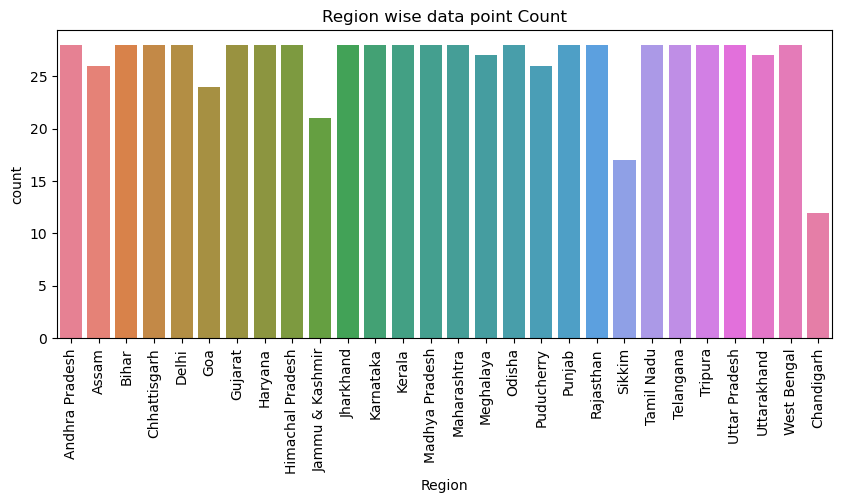

In [29]:
plt.figure(figsize = (10,4))
sns.countplot(df19,x="Region",palette="husl").tick_params(axis="x",rotation=90)
plt.title("Region wise data point Count")
plt.show()

In [30]:
## Almost all the cities in India having "Region wise data point Count" = 28 nos except Assam,Goa,Jammu & Kashmir,Meghalaya,
## Puducherry, Sikkim and Chandigarh. With Chandigarh having the lowest data points in the DATASET.

In [31]:
## Area wise data point distribution.

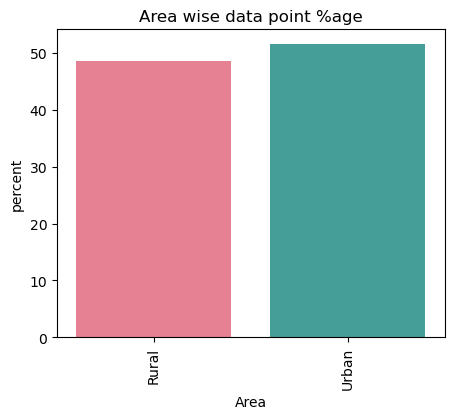

In [32]:
plt.figure(figsize = (5,4))
sns.countplot(df19,x="Area",palette="husl",stat='percent').tick_params(axis="x",rotation=90)
plt.title("Area wise data point %age")
plt.show()

In [33]:
## More than 50% of the data points are from the Urban area.

In [34]:
NUM_COLS_FILT=['Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)','Estimated Employed (Laks)']

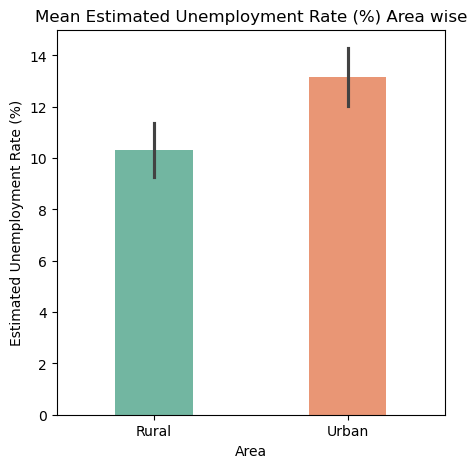

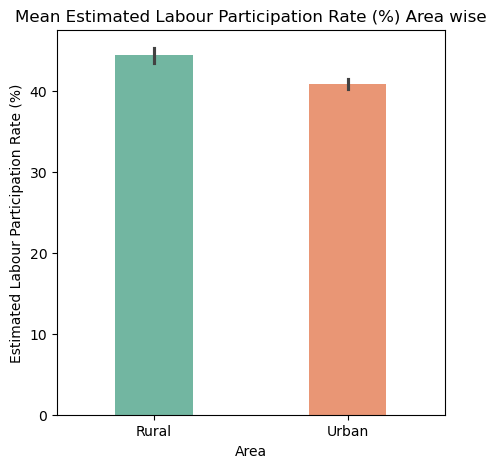

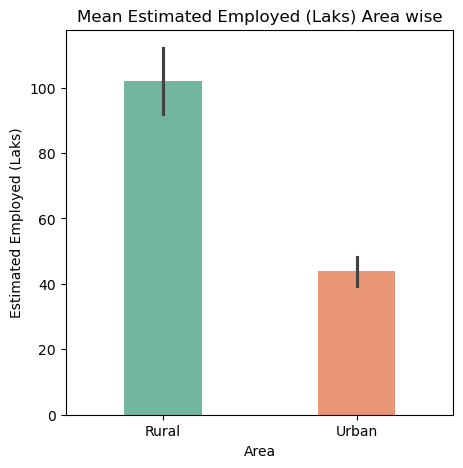

In [35]:
## Area Wise Data distribution

for num1 in NUM_COLS_FILT:
    plt.figure(figsize = (5,5))
    ax=sns.barplot(data=df19,y=num1,x="Area",estimator="mean",palette="Set2",gap=0.5)
    plt.title(f"Mean {num1} Area wise")
    plt.show()

In [36]:
## The Mean unemploment Rate is High in urban Area compared to Rural Area.
## The Estimated Labour Participation Rate (%) is Almost same for both the areas.

In [37]:
## Region Wise Data distribution with hue as Area

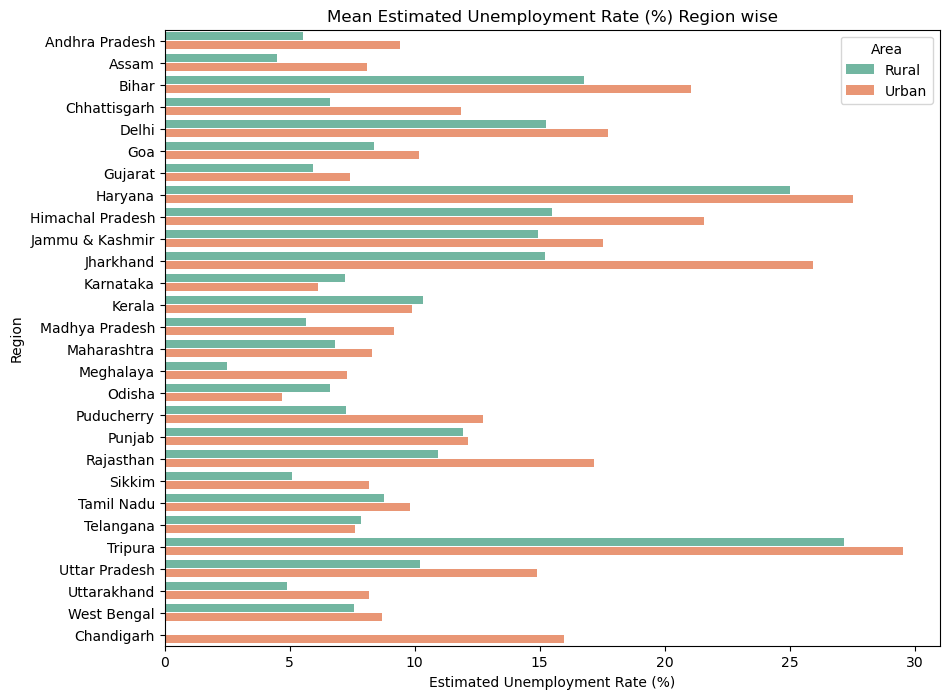

Minimum Estimated Unemployment Rate (%), is 2.48 in Meghalaya region for Rural area
Maximum Estimated Unemployment Rate (%), is 27.17 in Tripura region for Rural area
Minimum Estimated Unemployment Rate (%), is 4.70 in Odisha region for Urban area
Maximum Estimated Unemployment Rate (%), is 29.53 in Tripura region for Urban area


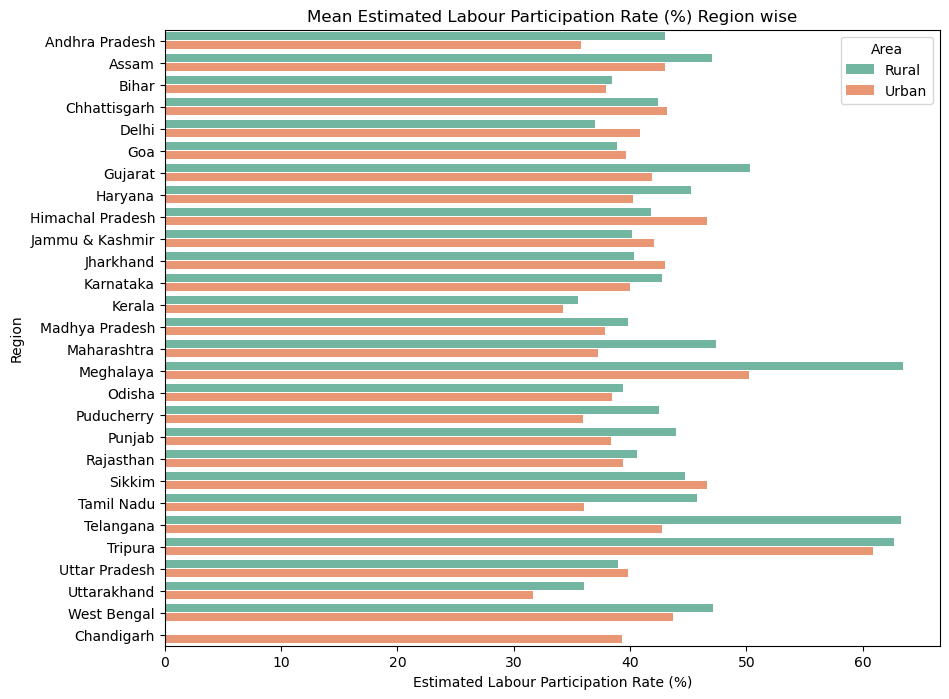

Minimum Estimated Labour Participation Rate (%), is 35.49 in Kerala region for Rural area
Maximum Estimated Labour Participation Rate (%), is 63.45 in Meghalaya region for Rural area
Minimum Estimated Labour Participation Rate (%), is 31.69 in Uttarakhand region for Urban area
Maximum Estimated Labour Participation Rate (%), is 60.92 in Tripura region for Urban area


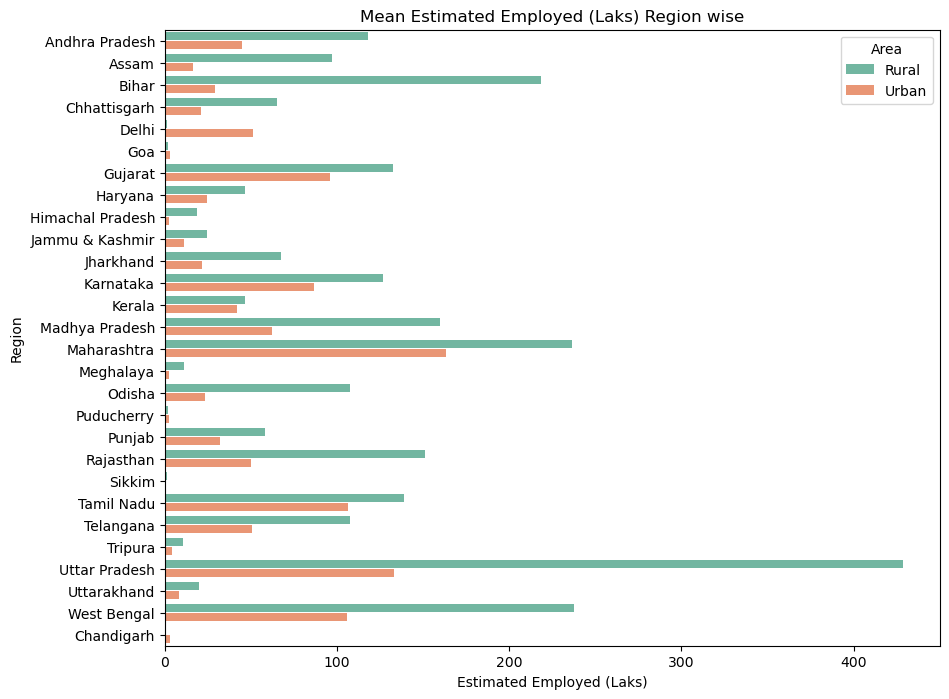

Minimum Estimated Employed (Laks), is 1.48 in Delhi region for Rural area
Maximum Estimated Employed (Laks), is 428.67 in Uttar Pradesh region for Rural area
Minimum Estimated Employed (Laks), is 0.89 in Sikkim region for Urban area
Maximum Estimated Employed (Laks), is 163.54 in Maharashtra region for Urban area


In [38]:
## Region Wise Data distribution with hue as Area
Area = ["Rural","Urban"]

## Aggregating Data based upon the Region.
data4 = df19.groupby(["Region","Area"]).mean()
df4= data4.reset_index()

for b1 in NUM_COLS_FILT:
    plt.figure(figsize = (10,8))
    ax=sns.barplot(data=df19,x=b1,y="Region",estimator="mean",errorbar=None,palette="Set2",gap=0.1,hue="Area")
    plt.title(f"Mean {b1} Region wise")
    plt.show()
    for a1 in Area:
        cmin = df4[df4["Area"]== a1 ].sort_values(by=b1).head(1).iloc[0]
        cmax = df4[df4["Area"]== a1 ].sort_values(by=b1,ascending=False).head(1).iloc[0]
        ## Description of max min values
        if b1==NUM_COLS_FILT[0]:    
            print(f"Minimum {b1}, is {cmin[2]:.2f} in {cmin[0]} region for {a1} area")
            print(f"Maximum {b1}, is {cmax[2]:.2f} in {cmax[0]} region for {a1} area")
        elif b1==NUM_COLS_FILT[1]:
            print(f"Minimum {b1}, is {cmin[3]:.2f} in {cmin[0]} region for {a1} area")
            print(f"Maximum {b1}, is {cmax[3]:.2f} in {cmax[0]} region for {a1} area")
        else:
            print(f"Minimum {b1}, is {cmin[6]:.2f} in {cmin[0]} region for {a1} area")
            print(f"Maximum {b1}, is {cmax[6]:.2f} in {cmax[0]} region for {a1} area")

## EDA of Numerical Columns

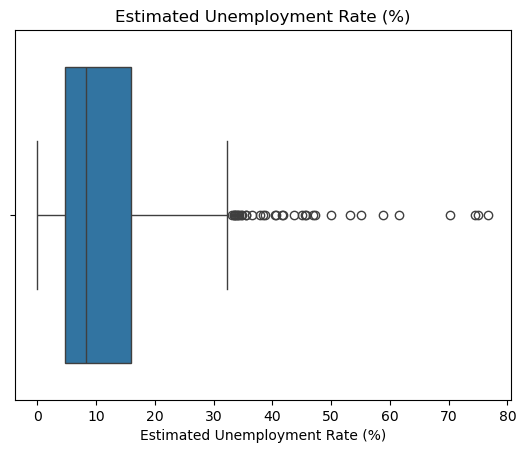

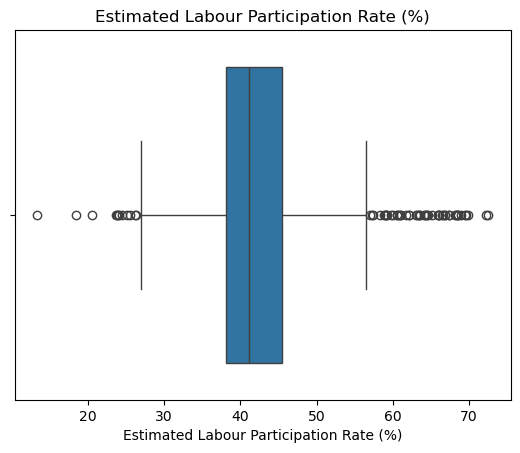

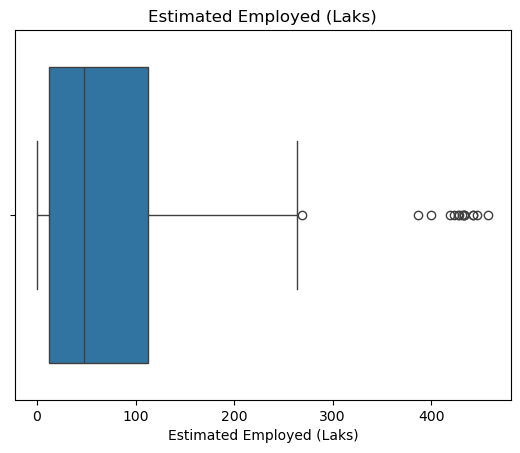

In [39]:

for i in NUM_COLS_FILT:
    sns.boxplot(data =df19, x=i)
    plt.title(i)
    plt.show()

<Figure size 1000x1000 with 0 Axes>

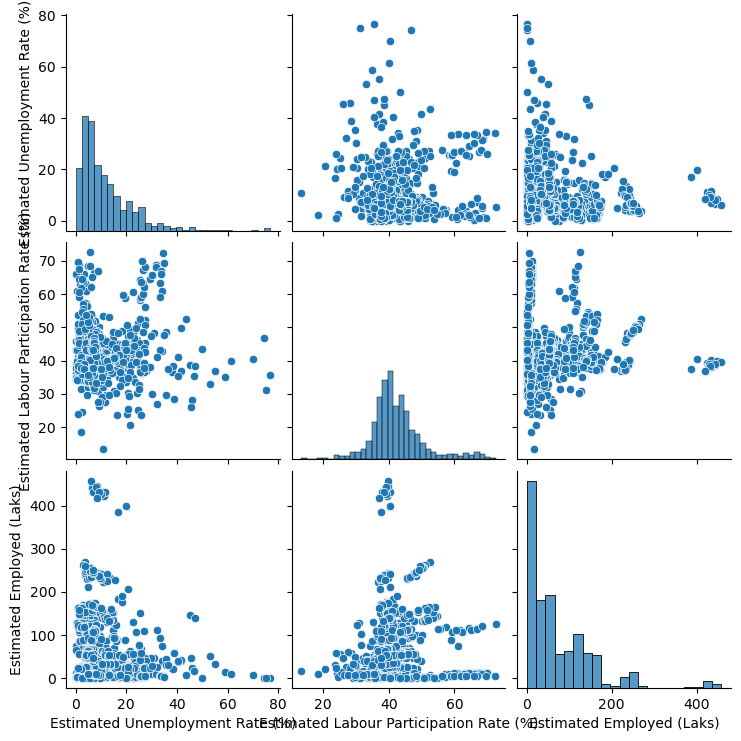

In [40]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df19, vars = NUM_COLS_FILT)
plt.show()

<Axes: >

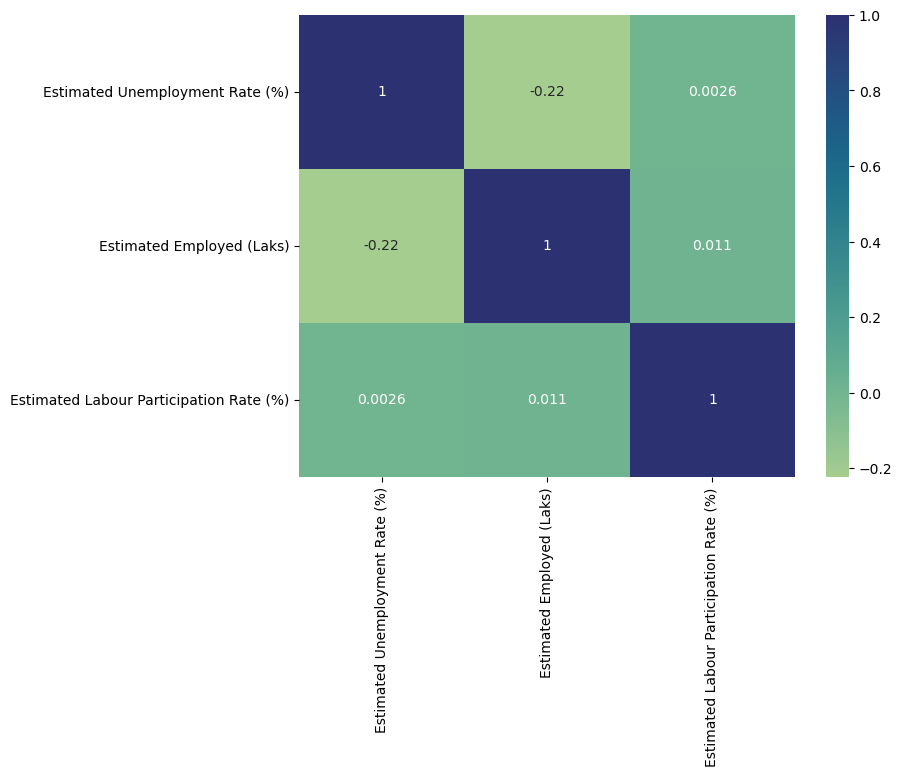

In [41]:
correlation = df19[['Estimated Unemployment Rate (%)', "Estimated Employed (Laks)", 'Estimated Labour Participation Rate (%)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation,annot=True,cmap="crest")

In [42]:
## The 'Estimated Unemployment Rate (%)' is having a weak negetive correlation with " Estimated Employed (Laks)".
## The other linear relationships can be seen from the above heat map.

In [43]:
## Unemployment Rate & Labour Participation Rate with Time

In [44]:
## Aggregating Data based upon the Date.
data = df19.groupby(df19["Date"]).mean()
df= data.reset_index()

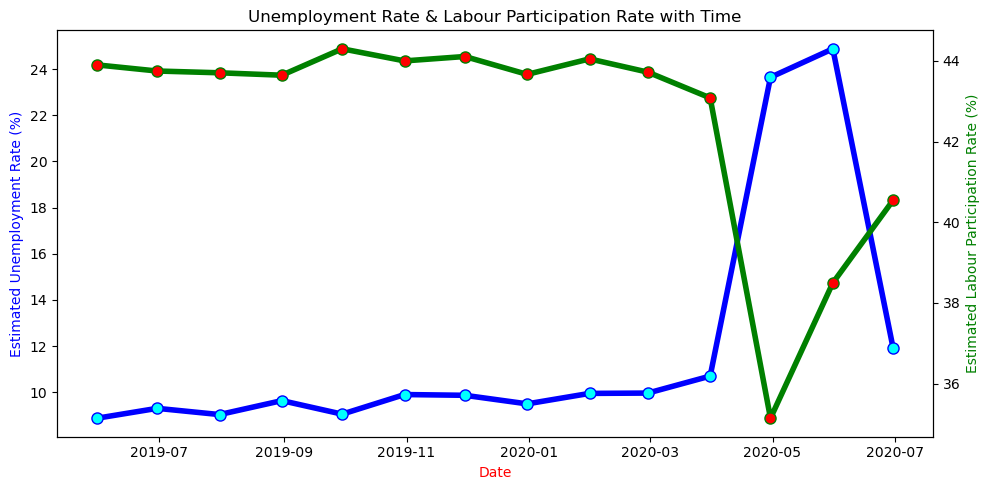

In [45]:
x= df["Date"]

# y-axis values
y1 = df["Estimated Unemployment Rate (%)"]

# secondary y-axis values
y2 = df["Estimated Labour Participation Rate (%)"]

# plotting figures by creating axes object
# using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title(f"Unemployment Rate & Labour Participation Rate with Time")

# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(x, y1, 'b-o', lw = 4, markersize = 8,  markerfacecolor='cyan')
ax2.plot(x, y2, 'g-o', lw = 4, markersize = 8,  markerfacecolor='red')

# giving labels to the axises
ax.set_xlabel('Date', color = 'r')
ax.set_ylabel('Estimated Unemployment Rate (%)', color = 'b')

# secondary y-axis label
ax2.set_ylabel('Estimated Labour Participation Rate (%)', color = 'g')

# defining display layout 
plt.tight_layout()

# show plot
plt.show()


### Source: Google
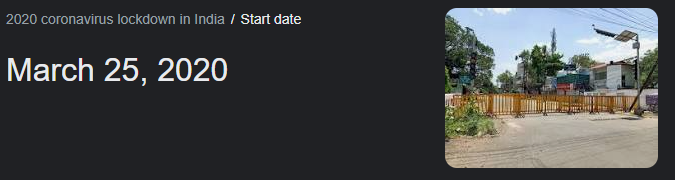



In [46]:
## The estimated unemployment rate has shown a slight increase trend in the month of April (Lockdown started in 25 March 2020)
## and hit a remarkable high of around 24 % in May and june month of 2020. i.e. When covid was in peak in INDIA.

## The Estimated Labour Participation Rate (%) has also shown a remarkable drop of 7% form avg of 42.63 to around 35% 
## in the month of may ,2020

## both the unemployment has decreased and Labour Participation Rate has increased after that poin of time, indicating that 
## situation getting normal after that.

In [47]:
## As we came to know the cut-off date (i.e. March 2020) for Corona let's analyse the parameters before and after corona.

In [48]:
## data points created by filtering the dates before corona
filtered_df = df19.query("Date >= '2019-05-31' \
                        and Date < '2020-03-31'")
## data points created by filtering the dates before corona
filtered_df2 = df19.query("Date >= '2020-04-30' \
                       and Date < '2020-06-30'")

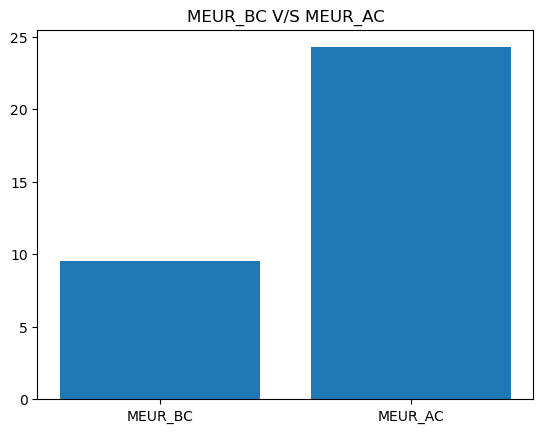

In [49]:
# Mean Estimated Unemployment Rate (%)(MEUR) before Corona
MEUR_BC = filtered_df["Estimated Unemployment Rate (%)"].mean()
# Mean Estimated Unemployment Rate (%)(MEUR) After Corona
MEUR_AC = filtered_df2["Estimated Unemployment Rate (%)"].mean()
ax1 = plt.bar(height=[MEUR_BC,MEUR_AC],x=["MEUR_BC","MEUR_AC"])
plt.title("MEUR_BC V/S MEUR_AC")
plt.show()

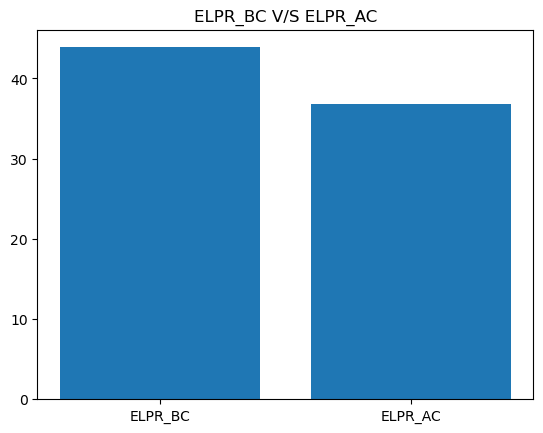

In [50]:
# Mean Estimated Labour Participation Rate (%)(ELPR) before Corona
ELPR_BC = filtered_df["Estimated Labour Participation Rate (%)"].mean()
# Mean Estimated Labour Participation Rate (%)(ELPR) After Corona
ELPR_AC = filtered_df2["Estimated Labour Participation Rate (%)"].mean()
ax1 = plt.bar(height=[ELPR_BC,ELPR_AC],x=["ELPR_BC","ELPR_AC"])
plt.title("ELPR_BC V/S ELPR_AC")
plt.show()

In [ ]:
# Let's analyze the unemploment data by region before and after corona

In [52]:
aa = filtered_df.groupby("Region").mean() #Grouping by region, of before corona Data set
bb= filtered_df2.groupby("Region").mean() #Grouping by region, of after corona Data set
aa.drop(["Month","Year"],axis=1,inplace=True)
bb.drop(["Month","Year"],axis=1,inplace=True)
cx = pd.merge(aa, bb, on = "Region", how = "inner") # merging both the data set.
cx.head()

,Estimated Unemployment Rate (%)_x,Estimated Labour Participation Rate (%)_x,Estimated Employed (Laks)_x,Estimated Unemployment Rate (%)_y,Estimated Labour Participation Rate (%)_y,Estimated Employed (Laks)_y
Region,,,,,,
Andhra Pradesh,5.037500,40.028000,83.807500,21.990000,33.462500,60.730000
Assam,6.372632,45.994737,55.663684,9.506667,42.496667,42.743333
Bihar,13.833000,38.484000,132.242500,47.247500,37.130000,80.757500
Chhattisgarh,7.706500,44.948500,44.740500,12.967500,32.322500,35.825000
Delhi,14.230500,41.474500,29.002500,26.435000,29.182500,13.982500


In [53]:
# Estimated Unemployment Rate (%) difference
cx["diff1"] = cx["Estimated Unemployment Rate (%)_y"]-cx["Estimated Unemployment Rate (%)_x"]

# Estimated Labour Participation Rate (%) difference
cx["diff2"] = cx["Estimated Labour Participation Rate (%)_x"]-cx["Estimated Labour Participation Rate (%)_y"]

# Estimated Employed (Laks) difference
cx["diff3"] = cx["Estimated Employed (Laks)_x"]-cx["Estimated Employed (Laks)_y"]
cx.head(5)

,Estimated Unemployment Rate (%)_x,Estimated Labour Participation Rate (%)_x,Estimated Employed (Laks)_x,Estimated Unemployment Rate (%)_y,Estimated Labour Participation Rate (%)_y,Estimated Employed (Laks)_y,diff1,diff2,diff3
Region,,,,,,,,,
Andhra Pradesh,5.037500,40.028000,83.807500,21.990000,33.462500,60.730000,16.952500,6.56550,23.077500
Assam,6.372632,45.994737,55.663684,9.506667,42.496667,42.743333,3.134035,3.49807,12.920351
Bihar,13.833000,38.484000,132.242500,47.247500,37.130000,80.757500,33.414500,1.35400,51.485000
Chhattisgarh,7.706500,44.948500,44.740500,12.967500,32.322500,35.825000,5.261000,12.62600,8.915500
Delhi,14.230500,41.474500,29.002500,26.435000,29.182500,13.982500,12.204500,12.29200,15.020000


In [54]:
# Region with max Unemployment Rate (%) diffrence before and after corona.

cx.sort_values(by=["diff1"],ascending=False).head(1)

,Estimated Unemployment Rate (%)_x,Estimated Labour Participation Rate (%)_x,Estimated Employed (Laks)_x,Estimated Unemployment Rate (%)_y,Estimated Labour Participation Rate (%)_y,Estimated Employed (Laks)_y,diff1,diff2,diff3
Region,,,,,,,,,
Puducherry,1.593,40.0575,2.341,75.416667,37.86,0.606667,73.823667,2.1975,1.734333


In [55]:
# Region with minimum Unemployment Rate (%) diffrence before and after corona.

cx.sort_values(by=["diff1"],ascending=False).tail(1)

,Estimated Unemployment Rate (%)_x,Estimated Labour Participation Rate (%)_x,Estimated Employed (Laks)_x,Estimated Unemployment Rate (%)_y,Estimated Labour Participation Rate (%)_y,Estimated Employed (Laks)_y,diff1,diff2,diff3
Region,,,,,,,,,
Jammu & Kashmir,17.22,42.478125,17.96,7.59,35.895,18.27,-9.63,6.583125,-0.31


In [ ]:
## Puducherry got heavily effected in Unemployment Rate (increases by 73.8%)
## where as Jammu & Kashmir seem to have a emploment rate increase after corona.

In [56]:
# Region with max Estimated Labour Participation Rate (%) diffrence before and after corona.

cx.sort_values(by=["diff2"],ascending=False).head(1)

,Estimated Unemployment Rate (%)_x,Estimated Labour Participation Rate (%)_x,Estimated Employed (Laks)_x,Estimated Unemployment Rate (%)_y,Estimated Labour Participation Rate (%)_y,Estimated Employed (Laks)_y,diff1,diff2,diff3
Region,,,,,,,,,
Tamil Nadu,2.8365,44.1005,138.792,40.855,27.8975,53.0525,38.0185,16.203,85.7395


In [57]:
# Region with min Estimated Labour Participation Rate (%) diffrence before and after corona.
cx.sort_values(by=["diff2"],ascending=False).tail(1)

,Estimated Unemployment Rate (%)_x,Estimated Labour Participation Rate (%)_x,Estimated Employed (Laks)_x,Estimated Unemployment Rate (%)_y,Estimated Labour Participation Rate (%)_y,Estimated Employed (Laks)_y,diff1,diff2,diff3
Region,,,,,,,,,
Karnataka,3.2345,40.4795,108.1825,24.4725,43.095,90.0325,21.238,-2.6155,18.15


In [ ]:
## Tamil Nadu shows a highest decrease in Labour Participation Rate (%) of 16.2 %
## where as Karnataka shows a increase in Labour Participation Rate (%) of 2.6 %

In [58]:
# Region with max Estimated Employed (Laks) diffrence before and after corona.
cx.sort_values(by=["diff3"],ascending=False).head(1)

,Estimated Unemployment Rate (%)_x,Estimated Labour Participation Rate (%)_x,Estimated Employed (Laks)_x,Estimated Unemployment Rate (%)_y,Estimated Labour Participation Rate (%)_y,Estimated Employed (Laks)_y,diff1,diff2,diff3
Region,,,,,,,,,
Tamil Nadu,2.8365,44.1005,138.792,40.855,27.8975,53.0525,38.0185,16.203,85.7395


In [59]:
# Region with min Estimated Employed (Laks) diffrence before and after corona.
cx.sort_values(by=["diff3"],ascending=False).tail(1)

,Estimated Unemployment Rate (%)_x,Estimated Labour Participation Rate (%)_x,Estimated Employed (Laks)_x,Estimated Unemployment Rate (%)_y,Estimated Labour Participation Rate (%)_y,Estimated Employed (Laks)_y,diff1,diff2,diff3
Region,,,,,,,,,
Jammu & Kashmir,17.22,42.478125,17.96,7.59,35.895,18.27,-9.63,6.583125,-0.31


In [ ]:
## In Tamil Nadu on an avarage of 85 laks people got job less after corona.
## Where as in Jammu & Kashmir on an avarage 0.31 laks people got employed after corona.

# 5. Summary

In [ ]:
## The estimated unemployment rate has shown a slight increase trend in the month of April (Lockdown started in 25 March 2020)
## and hit a remarkable high of around 24 % in May and june month of 2020. i.e. When covid was in peak in INDIA.

## The Estimated Labour Participation Rate (%) has also shown a remarkable drop of 7% form avg of 42.63 to around 35% 
## in the month of may ,2020

## both the unemployment has decreased and Labour Participation Rate has increased after that poin of time, indicating that 
## situation getting normal after that.

## Puducherry got heavily effected in Unemployment Rate (increases by 73.8%)
## where as Jammu & Kashmir seem to have a emploment rate increase after corona.

## Tamil Nadu shows a highest decrease in Labour Participation Rate (%) of 16.2 %
## where as Karnataka shows a increase in Labour Participation Rate (%) of 2.6 %